In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import algs
from learner import evaluate

In [9]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    return sum(actual == predicted) / float(len(actual)) * 100.0

# Plot results of training and print accuracy metrics
def show_results(train_accuracy, test_accuracy, loss, loss_string, baseline_f):
    plt.plot(np.mean(loss, axis=0))
    plt.title(loss_string + " Loss Plot")
    plt.ylabel(loss_string + " Loss")
    plt.xlabel("Epoch Number")
    plt.show()
    
    baseline = baseline_f()
    baseline.fit(x,y)
    y_pred = baseline.predict(x)
    
    print("Mean Training Accuracy for " + loss_string + " Loss: %.3f%%" % np.mean(train_accuracy))
    print("Mean Testing Accuracy for " + loss_string + " Loss: %.3f%%" % np.mean(test_accuracy))
    print("Baseline accuracy for " + loss_string + " Loss: %.3f%%" % accuracy_metric(y, y_pred))

In [3]:
# DIABETES DATASET, BINARY
# load and prepare data
filename = '../datasets/pima-indians-diabetes.csv'
dataset = np.genfromtxt(filename, delimiter=',')
np.array(dataset).astype(float)
split = np.split(dataset, [-1], axis=1)
diabetes_x = np.insert(split[0], 0, 1, axis=1)
diabetes_x = MinMaxScaler().fit_transform(diabetes_x)
diabetes_y = np.ndarray.flatten(split[1]).astype(int)
diabetes = diabetes_x, diabetes_y

In [ ]:
# LETTER RECOGNITION, MULTICLASS
# load and prepare data
filename = '../datasets/letter-recognition.csv'
dataset = np.genfromtxt(filename, delimiter=',', dtype='<U3')
split = np.split(dataset, [1], axis=1)
letter_x = np.insert(split[1], 0, 1, axis=1).astype('float')
letter_x = MinMaxScaler().fit_transform(letter_x)
convert_to_num = np.vectorize(ord)
letter_y = convert_to_num(np.ndarray.flatten(split[0])) - ord('A')
if min(letter_y) != 0:
    letter_y -= min(letter_y)

In [4]:
# evaluation parameters
n_folds = 5
lr = 0.05
n_epoch = 500

# choose dataset
x = diabetes_x
y = diabetes_y

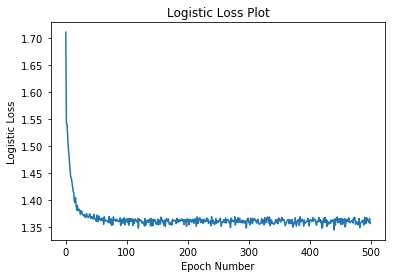

Mean Training Accuracy for Logistic Loss: 70.327%
Mean Testing Accuracy for Logistic Loss: 65.951%
Baseline accuracy for Logistic Loss: 77.214%


In [10]:
# logistic loss
from sklearn.linear_model import LogisticRegression
training_accuracy, testing_accuracy, loss = evaluate(x, y, n_folds, lr, n_epoch, algs.hinge)
show_results(training_accuracy, testing_accuracy, loss, "Logistic", LogisticRegression)

In [ ]:
# hinge loss, treating margin as a confidence